In [2]:

from display import STMimagePlot
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, display
import warnings
warnings.filterwarnings("ignore")

In [7]:
myDir,myFolder,myfileName="../../../STMdata","20221116","SiC028.sxm"
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)

SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosX_nm  from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosY_nm from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_RANGE from STMimageInfo WHERE List_ID=5836


SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SELECT Z_forward from STMimageValue WHERE List_ID=5836
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosX_nm  from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosY_nm from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SEL

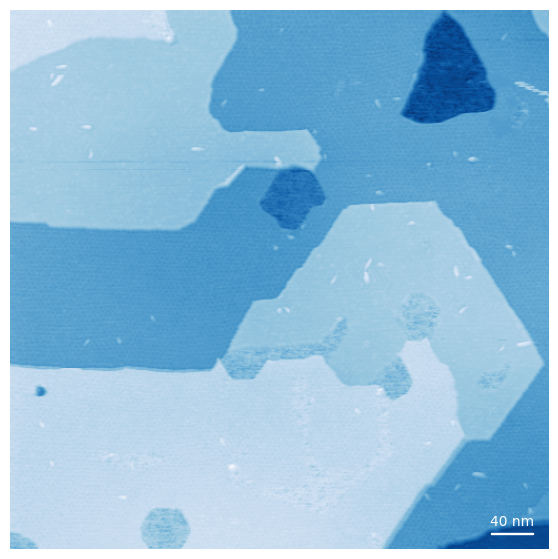

In [16]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
Myimage.display_topo(fig,ax,channel="Z_forward",imagetitle="",isgauss=False,iscorrect=False,isbar=True,iscolorbar=False)
fig.savefig('./svg_folder/forward.svg', dpi=600,format="svg", metadata=None,transparent=True,
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SELECT Z_forward from STMimageValue WHERE List_ID=5836
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosX_nm  from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosY_nm from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SEL

,Name,Value
0,List_ID,5836
1,TIME_STAMP,1668913007.0
2,NANONIS_VERSION,2
3,SCANIT_TYPE,FLOAT MSBFIRST
4,REC_DATE,20.11.2022
5,REC_TIME,13:56:47
6,REC_TEMP,290.0000000000
7,ACQ_TIME,1153.9
8,SCAN_PIXELS,512 512
9,SCAN_FILE,C:\STM data\20221116\SiC028.sxm


SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SELECT Z_backward from STMimageValue WHERE List_ID=5836
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosX_nm  from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosY_nm from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SE

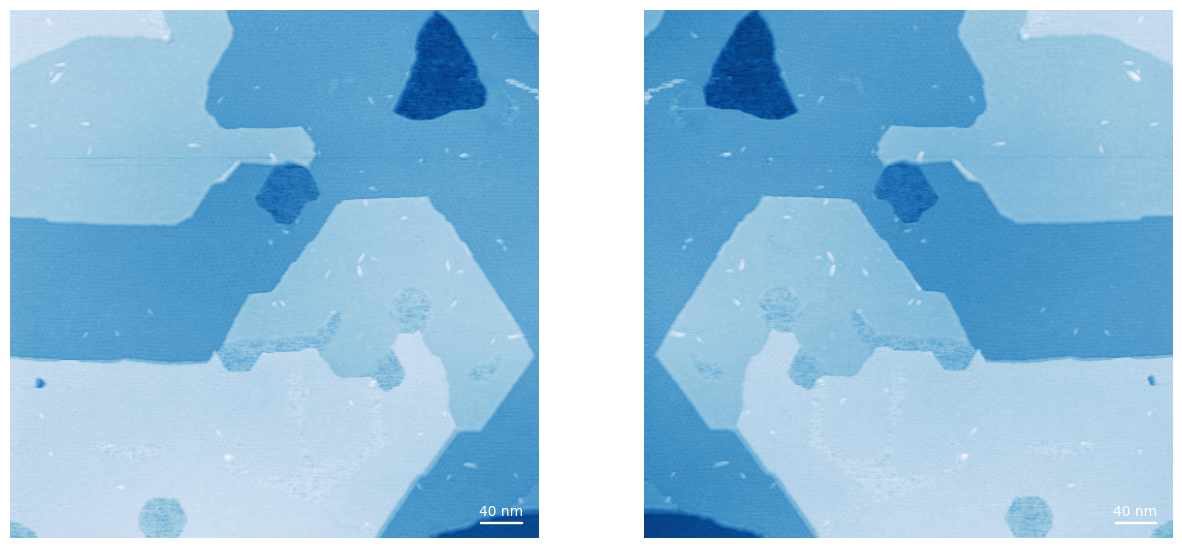

In [12]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
Myimage.display_topo(fig,ax[0],channel="Z_forward",imagetitle="",isgauss=False,iscorrect=False,isbar=True,iscolorbar=False)
Myimage.display_meta_data()
Myimage.display_topo(fig,ax[1],channel="Z_backward",imagetitle="",isgauss=False,iscorrect=False,isbar=True,iscolorbar=False)
fig.savefig('../image_save/forward.svg', dpi=600,format="svg", metadata=None,transparent=True,
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

In [8]:

with open('show_list.html', 'r') as html_file:
    html_content = html_file.read()
display(HTML(html_content))

In [4]:

with open('index.html', 'r') as html_file:
    html_content = html_file.read()
display(HTML(html_content))

In [5]:

with open('show_index.html', 'r') as html_file:
    html_content = html_file.read()
display(HTML(html_content))

In [18]:

with open('image_compare.html', 'r') as html_file:
    html_content = html_file.read()
display(HTML(html_content))